In [1]:
import pandas as pd
import numpy as np
from data_storage import create_connection
import matplotlib.pyplot as plt

In [2]:
#this notebook anaylzes the change of the risk-adjusted performance measures 
#by setting different thresholds and plots the changes for a long and short strategy

In [3]:
connection = create_connection("../database/crypto_billionairs.db")

In [4]:
sql = 'SELECT table_name'\
        ', annualized_return as annualized_return'\
        ', annualized_return / trades_count AS ann_return_per_trade'\
        ', win_rate AS win_rate'\
        ', sharpe_ratio_annualized as sharpe_ratio'\
        ', sortino_ratio_annualized as sortino_ratio'\
        ', maximum_drawdown as maximum_drawdown'\
        ', calmar_ratio_annualized as calmar_ratio'\
        ' FROM cryptocurrencies_risk_metrics_1m_abnormal_day_ml_threshold'\
        ' where timehorizon >= 365'
       

df = pd.read_sql_query(f"{sql}", connection)
df.head()

,table_name,annualized_return,ann_return_per_trade,win_rate,sharpe_ratio,sortino_ratio,maximum_drawdown,calmar_ratio
0,no_0_threshold_ensemble_long_ADA_,12.051090,0.033017,53.150685,20.850254,2.526250,-0.207492,5.862978
1,no_0_threshold_ensemble_long_BCH_,-3.413077,-0.005670,50.000000,-12.151466,-1.766080,-0.889355,-0.953379
2,no_0_threshold_ensemble_long_BSV_,-7.517525,-0.020653,47.802198,-11.375123,-1.561076,-0.679517,-1.106305
3,no_0_threshold_ensemble_long_BTC_,2.249213,0.001546,52.439863,28.903735,2.595201,-0.799659,1.579206
4,no_0_threshold_ensemble_long_BTG_,-3.692927,-0.005976,49.190939,-14.205675,-1.978204,-0.960893,-0.989716


In [5]:
df["threshold"] = df["table_name"].str.split("_").str[1].astype(int)
df["type"] = df["table_name"].str.split("_").str[4]
df = df.drop(["table_name"], axis = 1)

In [6]:
df_plt = df.groupby(by=["type", "threshold"]).mean()

In [14]:
df_plt.xs("long")

,annualized_return,ann_return_per_trade,win_rate,sharpe_ratio,sortino_ratio,maximum_drawdown,calmar_ratio
threshold,,,,,,,
0,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
1,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
2,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
3,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
4,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
5,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
6,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
7,10.997554,0.051191,49.791051,4.512640,0.566378,-0.672778,2.525765
8,14.948603,0.070324,49.931150,4.188361,0.536099,-0.672115,5.456567


Text(0, 0.5, 'Return (ann.)')

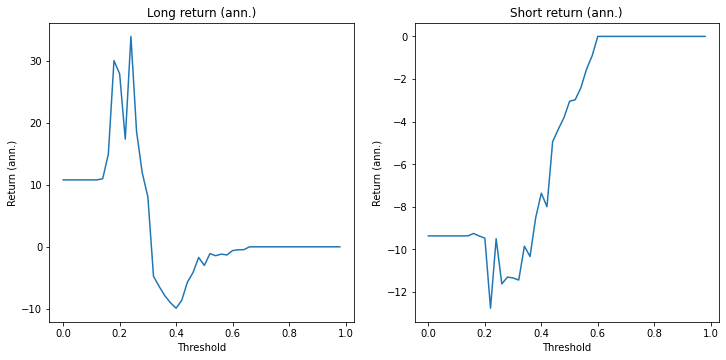

In [8]:
plt.rcParams["figure.figsize"] = (12, 5.5)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.arange(0, len(df_plt.xs("long") + 1) * 0.02, 0.02), df_plt.xs("long")["annualized_return"])
plt.title("Long return (ann.)")
plt.xlabel("Threshold")
plt.ylabel("Return (ann.)") 

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(0, len(df_plt.xs("short") + 1) * 0.02, 0.02), df_plt.xs("short")["annualized_return"])
plt.title("Short return (ann.)")
plt.xlabel("Threshold")
plt.ylabel("Return (ann.)")

Text(0, 0.5, 'Sharpe Ratio')

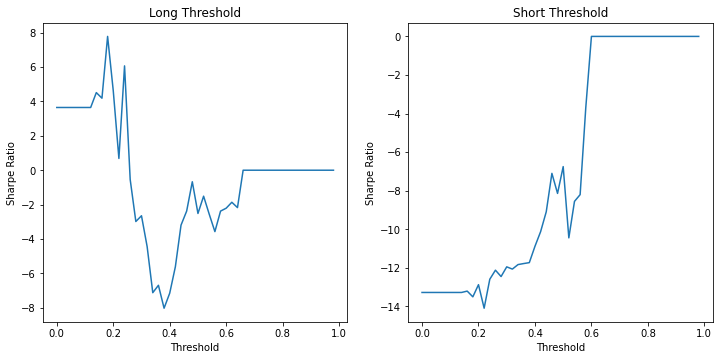

In [9]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, len(df_plt.xs("long") + 1) * 0.02, 0.02), df_plt.xs("long")["sharpe_ratio"])
plt.title("Long Threshold")
plt.xlabel("Threshold")
plt.ylabel("Sharpe Ratio") 

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(0, len(df_plt.xs("short") + 1) * 0.02, 0.02), df_plt.xs("short")["sharpe_ratio"])
plt.title("Short Threshold")
plt.xlabel("Threshold")
plt.ylabel("Sharpe Ratio") 

Text(0, 0.5, 'Sortino Ratio')

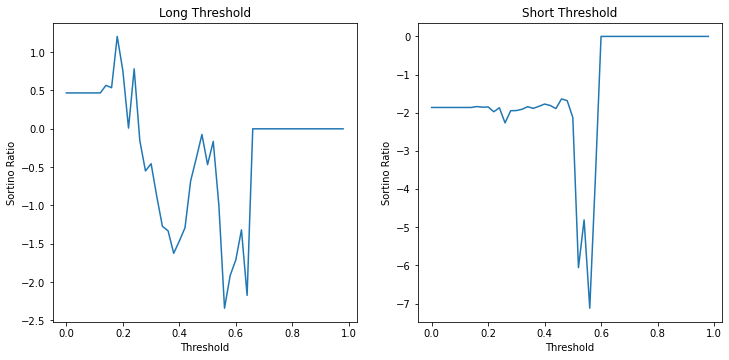

In [10]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.arange(0, len(df_plt.xs("long") + 1) * 0.02, 0.02), df_plt.xs("long")["sortino_ratio"])
plt.title("Long Threshold")
plt.xlabel("Threshold")
plt.ylabel("Sortino Ratio") 

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(0, len(df_plt.xs("short") + 1) * 0.02, 0.02), df_plt.xs("short")["sortino_ratio"])
plt.title("Short Threshold")
plt.xlabel("Threshold")
plt.ylabel("Sortino Ratio") 

Text(0, 0.5, 'Maximum Drawdown')

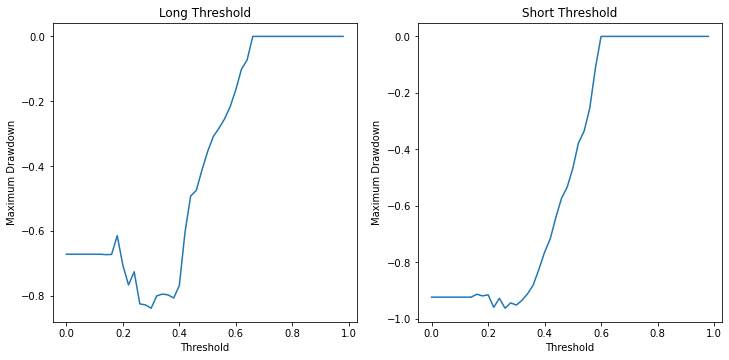

In [11]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.arange(0, len(df_plt.xs("long") + 1) * 0.02, 0.02), df_plt.xs("long")["maximum_drawdown"])
plt.title("Long Threshold")
plt.xlabel("Threshold")
plt.ylabel("Maximum Drawdown") 

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(0, len(df_plt.xs("short") + 1) * 0.02, 0.02), df_plt.xs("short")["maximum_drawdown"])
plt.title("Short Threshold")
plt.xlabel("Threshold")
plt.ylabel("Maximum Drawdown")

Text(0, 0.5, 'Calmar Ratio')

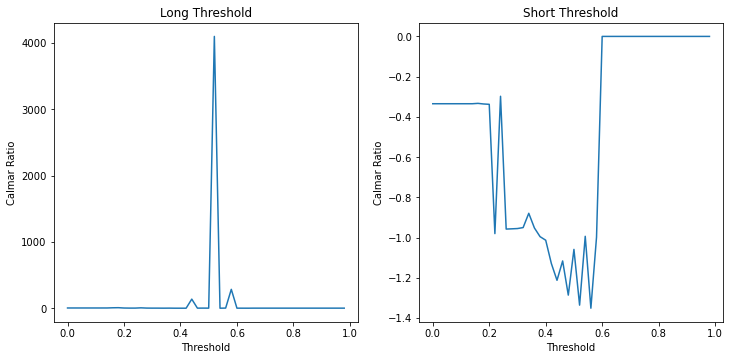

In [12]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.arange(0, len(df_plt.xs("long") + 1) * 0.02, 0.02), df_plt.xs("long")["calmar_ratio"])
plt.title("Long Threshold")
plt.xlabel("Threshold")
plt.ylabel("Calmar Ratio") 

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(0, len(df_plt.xs("short") + 1) * 0.02, 0.02), df_plt.xs("short")["calmar_ratio"])
plt.title("Short Threshold")
plt.xlabel("Threshold")
plt.ylabel("Calmar Ratio")

Text(0, 0.5, 'Maximum Drawdown')

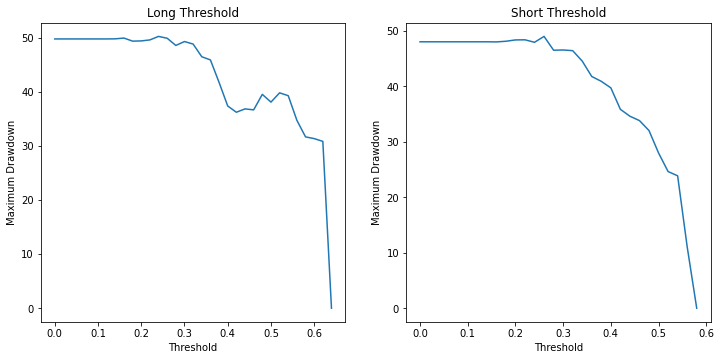

In [13]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.arange(0, len(df_plt.xs("long") + 1) * 0.02, 0.02), df_plt.xs("long")["win_rate"])
plt.title("Long Threshold")
plt.xlabel("Threshold")
plt.ylabel("Win Rate") 

plt.subplot(1, 2, 2) # index 2
plt.plot(np.arange(0, len(df_plt.xs("short") + 1) * 0.02, 0.02), df_plt.xs("short")["win_rate"])
plt.title("Short Threshold")
plt.xlabel("Threshold")
plt.ylabel("Win Rate")